<center>
<img src =data/oh-hi-there.gif width = 500 />
</center>

### Assignment-9

What is the amount of wins for either of the two drivers that would allow you to conclude that one of them is better than the other, assuming a significance level of 5% (essentially, find the rejection regions or the confidence interval for our MV/LH experiment)?

In [39]:
from scipy.stats import binom

n = 100 
p = 0.5  
alpha = 0.05
lower_critical_value = binom.ppf(alpha / 2, n=n, p=p)
upper_critical_value = binom.ppf(1 - alpha / 2, n=n, p=p)

lower_bound = lower_critical_value + 1
# This addition of 1 is often done to make sure that the lower bound is an inclusive value. 
# In statistical terms, it ensures that the lower bound represents the minimum value within the confidence interval, including that value itself.

upper_bound = upper_critical_value

print(f"Lower bound of the confidence interval: {lower_bound} wins")
print(f"Upper bound of the confidence interval: {upper_bound} wins")

Lower bound of the confidence interval: 41.0 wins
Upper bound of the confidence interval: 60.0 wins


In [42]:
import numpy as np
from scipy.stats import binom

n = 100  # Total number of races
p = 0.5  # Probability of winning each race

sims = 1000

all_values = [i for i in np.random.binomial(n=n, p=p, size=sims)]
sorted_values = np.sort(all_values)
lower_percentile = sorted_values[int(0.025 * sims)]
upper_percentile = sorted_values[int(0.975 * sims)]

lower_percentile, upper_percentile

(41, 60)

These percentiles represent the lower and upper bounds of the confidence interval. To conclude that one driver is better than the other, you can use these values as rejection regions. If a driver's wins fall below the lower percentile or above the upper percentile, you can conclude that they are better than the other driver.

For example, if you want to conclude that "Driver A is better than Driver B," you can check if the number of wins for Driver A is less than `lower_percentile` or greater than `upper_percentile`. If either condition is met, you can conclude that Driver A is better with a significance level of 5%.


In [33]:
# x = np.random.binomial(n=n, p=p, size=sims)
# y = sum([ binom.pmf(x, n=100, p=0.5) for x in range(0, 40)])
# y

0.01760010010885238

#### Trying to find some other way

<center>
<img src =data/expp.gif width = 500 />
</center>

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [12]:
def compare_drivers(wins_MV, total_races, significance_level=0.05, is_plot=False):
    wins_LH = total_races - wins_MV

    p_MV = wins_MV / total_races
    p_LH = wins_LH / total_races

    SE = np.sqrt((p_MV * (1 - p_MV) / total_races) + (p_LH * (1 - p_LH) / total_races))

    z_score = (p_MV - p_LH) / SE

    z_critical = norm.ppf(1 - significance_level / 2)

    conf_interval = (p_MV - p_LH) + np.array([-1, 1]) * z_critical * SE

    if conf_interval[0] <= 0 <= conf_interval[1]:
        comparison_result = "There is no significant difference between MV and LH."
    elif conf_interval[0] > 0:
        comparison_result = "MV is better than LH."
    else:
        comparison_result = "LH is better than MV."

    if is_plot:
        # Create subplots to visualize the results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Bar chart for proportions of wins
        drivers = ['MV', 'LH']
        proportions = [p_MV, p_LH]

        ax1.bar(drivers, proportions, color=['blue', 'red'])
        ax1.set_xlabel('Drivers')
        ax1.set_ylabel('Proportion of Wins')
        ax1.set_title('Proportions of Wins for MV and LH')

        # Bar chart for the confidence interval
        ax2.bar(['Confidence Interval'], [conf_interval[1] - conf_interval[0]], bottom=[conf_interval[0]], color='green', alpha=0.5)
        ax2.axhline(0, color='black', linestyle='--', linewidth=1)
        ax2.set_xlabel('Interval')
        ax2.set_ylabel('Difference in Proportions')
        ax2.set_title('Confidence Interval for Difference in Proportions')

        # Display the comparison result
        plt.suptitle(comparison_result)
        plt.tight_layout()
        plt.show()
    
    return comparison_result

In [13]:
def find_minimum_wins_MV(total_races, significance_level=0.05):
    low = 0
    high = total_races

    while low < high:
        mid = (low + high) // 2

        wins_MV = mid

        compare_result = compare_drivers(wins_MV, total_races, significance_level)

        if "MV is better than LH" in compare_result:
            high = mid  
        else:
            low = mid + 1
    
    compare_result = compare_drivers(low, total_races, significance_level)
    
    return low

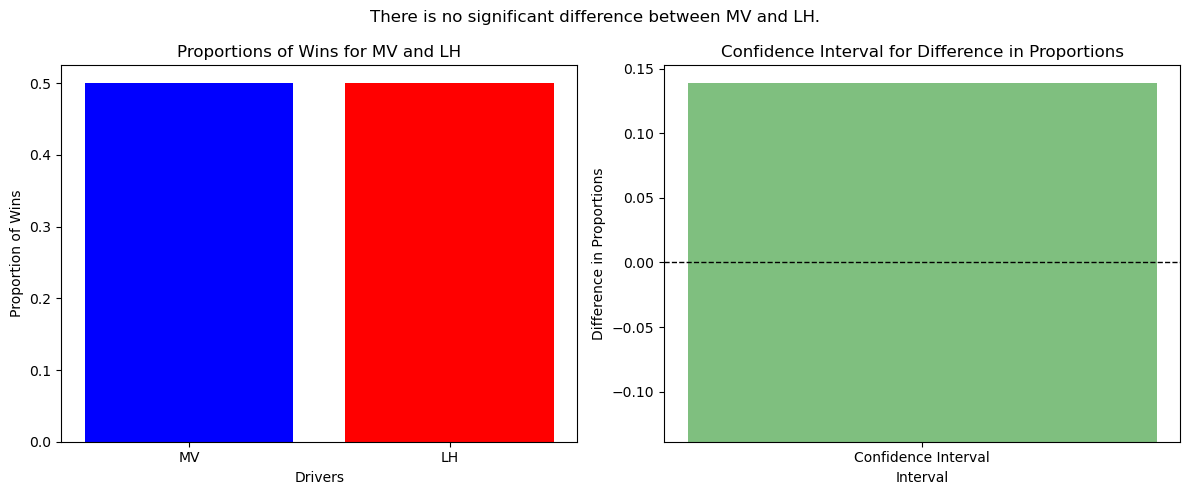

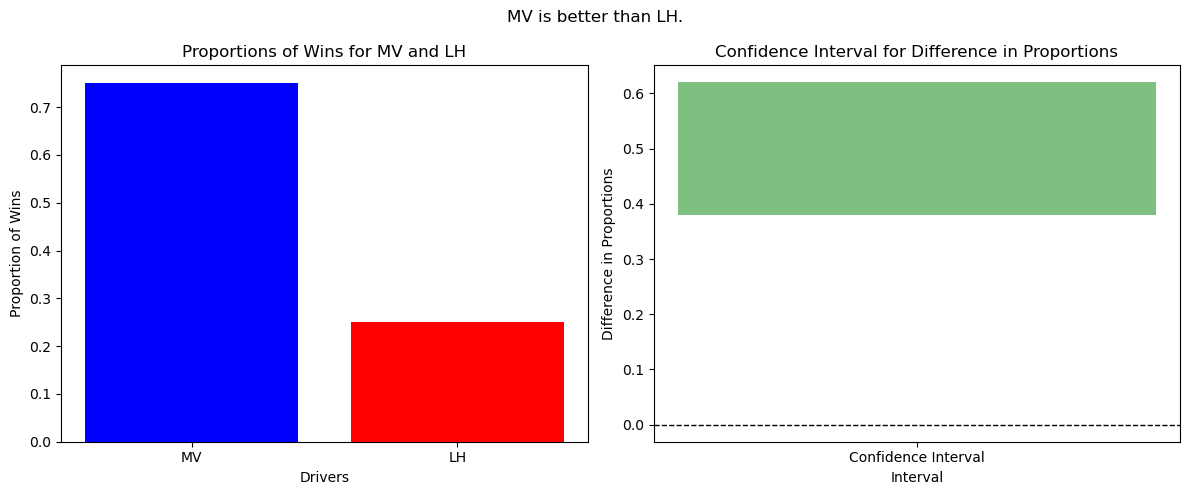

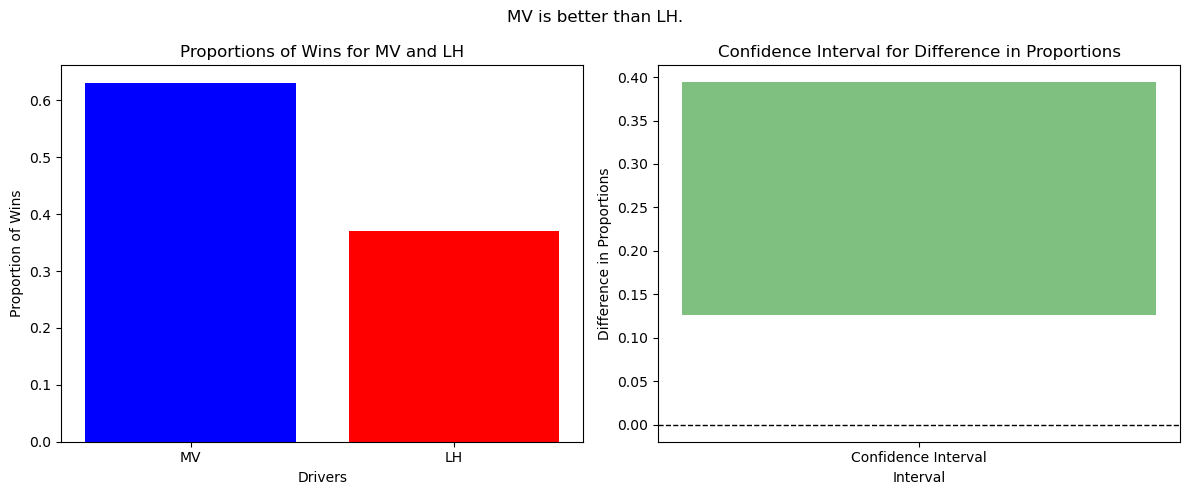

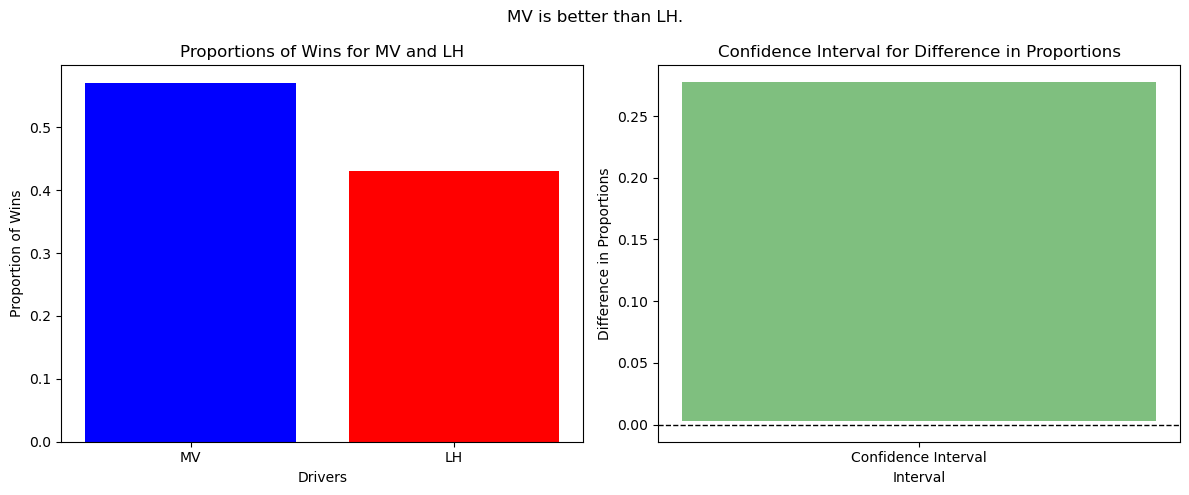

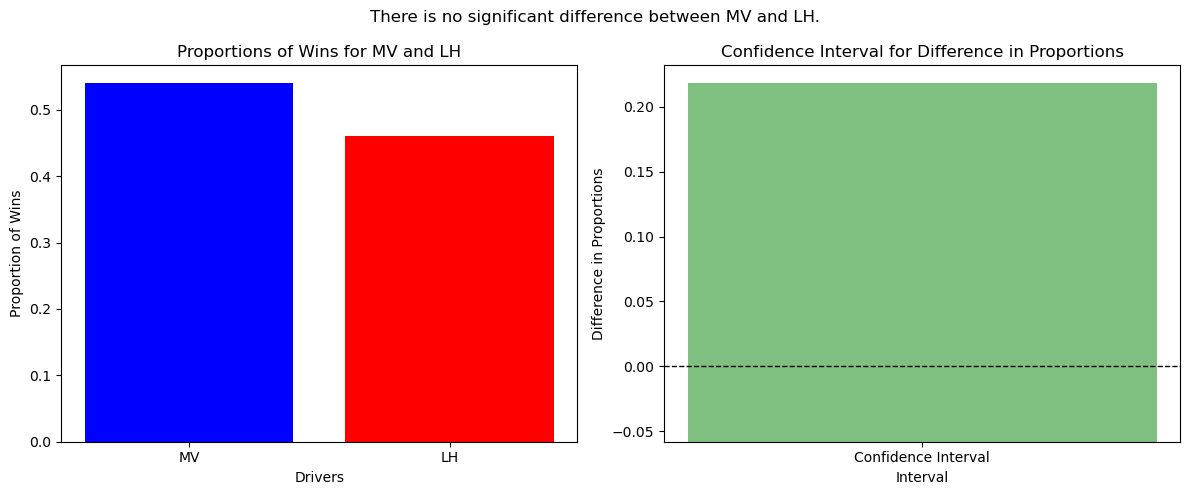

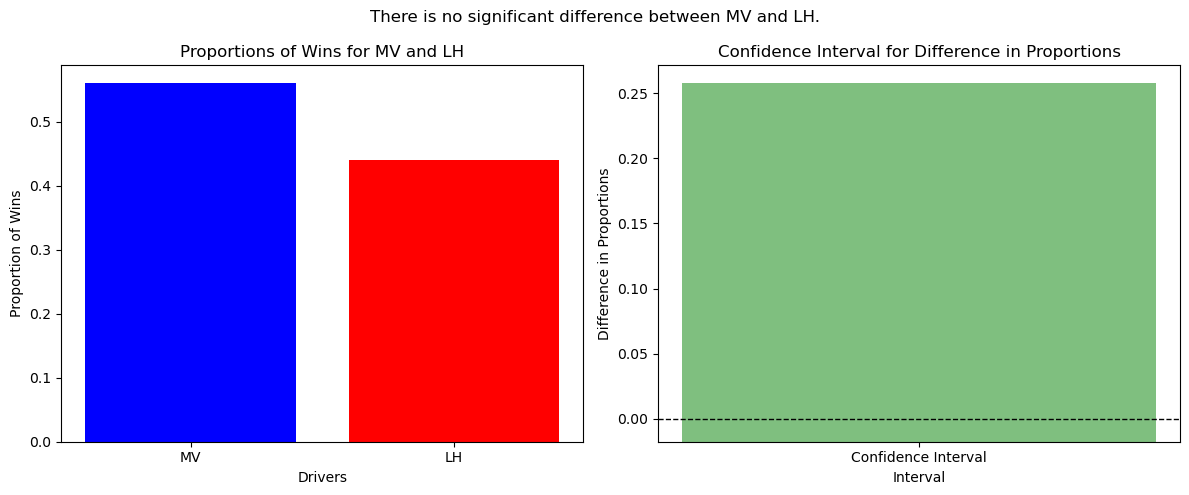

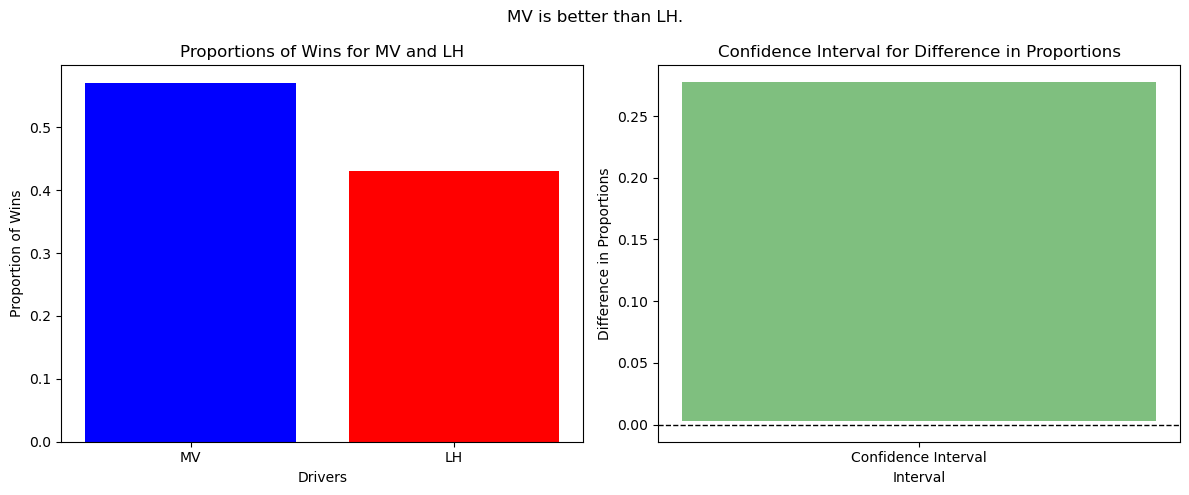

Minimum wins for MV: 57


In [13]:
# Example usage:
total_races = 100
significance_level=0.05
minimum_wins_MV = find_minimum_wins_MV(total_races, significance_level)
print(f"Minimum wins for MV: {minimum_wins_MV}")

#### The significance of the second graph:

- The confidence interval visually illustrates the range of values within which we can reasonably estimate the true difference in proportions between MV and LH.

- If the entire green bar lies above or below the black dashed line at zero (0), it indicates that the confidence interval does not include zero. In this case:
  - If the green bar is entirely above zero, it suggests that MV is statistically better than LH.
  - If the green bar is entirely below zero, it suggests that LH is statistically better than MV.

- Conversely, if the green bar crosses the black dashed line at zero (0), it implies that there is no statistically significant difference between the drivers, and their performance is considered comparable.


<center>
<img src =data/byee1.gif width = 500 />
</center>